## Homework

> **Note**: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. 
For this, we will use the "Bee or Wasp?" dataset that was obtained from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) and slightly rebuilt. 

You can download the dataset for this homework from [here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip):

```bash
wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
unzip data.zip
```

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

> **Note:** you will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). 
> You can also use a computer without a GPU (e.g. your laptop), but it will be slower.


### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. 

The dataset contains separate folders for training and test sets. 


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).


### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`


### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896
* 11214912


### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131


### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98


## Submit the results

- Submit your results here: https://forms.gle/5sjtM3kzY9TmLmU17
- If your answer doesn't match options exactly, select the closest one
- You can submit your solution multiple times. In this case, only the last submission will be used


## Deadline

The deadline for submitting is November 20 (Monday), 23:00 CET. After that the form will be closed.

## Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

2023-11-29 01:19:34.851018: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
SEED_VALUE = 100

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
# !unzip data.zip

In [4]:
from tensorflow.keras.preprocessing.image import load_img

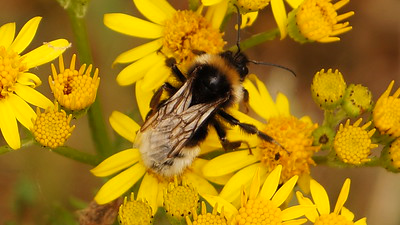

In [5]:
# load sample images 
path = './data/train/bee'
name = '21004953130_03d69a5dee_w.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

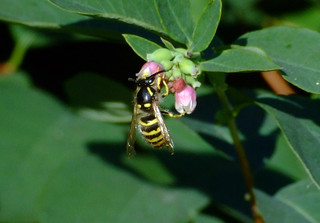

In [6]:
path = './data/train/wasp'
name = '213830122_2df34515e3_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname)
x = np.array(img)
x.shape

(223, 320, 3)

In [8]:
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_dir = './data/train'
test_dir = './data/test'

In [10]:
data_gen = ImageDataGenerator()

train_ds = data_gen.flow_from_directory(train_dir)
test_ds = data_gen.flow_from_directory(test_dir)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [11]:
print(train_ds.class_indices)
print(test_ds.class_indices)

{'bee': 0, 'wasp': 1}
{'bee': 0, 'wasp': 1}


In [12]:
print('train folder:', Counter(train_ds.classes))
print('test folder:', Counter(test_ds.classes))

train folder: Counter({0: 1976, 1: 1701})
test folder: Counter({0: 493, 1: 425})


## CNN modeling

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from dataclasses import dataclass

In [14]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 2
    IMG_HEIGHT:   int = 150
    IMG_WIDTH:    int = 150
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 10
    BATCH_SIZE:    int = 20
    LEARNING_RATE: float = 0.002

In [15]:
def cnn_model(input_shape=(150, 150, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [16]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

2023-11-29 01:24:43.462211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-29 01:24:43.469338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-29 01:24:43.470135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-29 01:24:43.471055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [18]:
opt = keras.optimizers.SGD(learning_rate=TrainingConfig.LEARNING_RATE, momentum=0.8)

In [19]:
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

## Q1

For binary classification problems (where there are only two classes) such as predicting if an image is a bee or a wasp, an appropiate loss function is binary crossentropy. Binary crossentropy calculates the loss by measuring the disparity between true labels and predicted probabilities, treating each class independently.  

Answer: `binary crossentropy`

## Q2

The number of parameters (weights and bias terms) can be determined as follows:

* input shape: `150x150x3`
* conv2d: 32 `3x3x3` filters => 864 weigths, 32 bias terms => 896 parameters

* max_pooling2d output: `74x74x32`                              
* flatten layer output: 175,232

* dense: 64 * 175232 weigths, 64 bias terms => 11,214,912 parameters  
* dense_1: 64 weights, 1 bias term => 65 parameters

Answer: The CNN model has `896 parameters` in the convolutional layer. 

## Generators and training

In [20]:
data_gen = ImageDataGenerator(rescale=1./255)

train_ds = data_gen.flow_from_directory(
    train_dir,
    target_size=(DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH),
    batch_size=TrainingConfig.BATCH_SIZE,
    class_mode='binary'
)

val_ds = data_gen.flow_from_directory(
    test_dir,
    target_size=(DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH),
    batch_size=TrainingConfig.BATCH_SIZE,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [21]:
history = model.fit(
    train_ds,
    epochs=TrainingConfig.EPOCHS,
    validation_data=val_ds
)

Epoch 1/10


2023-11-29 01:42:09.132149: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-29 01:42:09.754592: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-29 01:42:09.755073: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-29 01:42:09.755119: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-29 01:42:09.755601: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-29 01:42:09.755679: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 11s 45ms/step - loss: 0.6696 - accuracy: 0.5823 - val_loss: 0.6323 - val_accuracy: 0.6068
Epoch 2/10
184/184 [==============================] - 8s 44ms/step - loss: 0.6291 - accuracy: 0.6391 - val_loss: 0.6055 - val_accuracy: 0.6285
Epoch 3/10
184/184 [==============================] - 8s 44ms/step - loss: 0.5806 - accuracy: 0.6973 - val_loss: 0.6055 - val_accuracy: 0.6732
Epoch 4/10
184/184 [==============================] - 8s 43ms/step - loss: 0.5421 - accuracy: 0.7310 - val_loss: 0.5996 - val_accuracy: 0.6688
Epoch 5/10
184/184 [==============================] - 8s 44ms/step - loss: 0.5176 - accuracy: 0.7503 - val_loss: 0.5361 - val_accuracy: 0.7538
Epoch 6/10
184/184 [==============================] - 8s 43ms/step - loss: 0.4976 - accuracy: 0.7669 - val_loss: 0.5848 - val_accuracy: 0.6993
Epoch 7/10
184/184 [==============================] - 8s 43ms/step - loss: 0.4913 - accuracy: 0.7710 - val_loss: 0.5586 - val_accuracy: 0.7190
Epoch 8/1

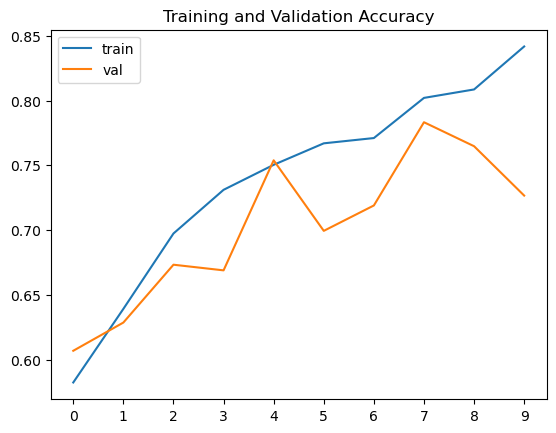

In [22]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.title('Training and Validation Accuracy')
plt.legend()

## Q3

In [23]:
np.median(history.history['accuracy'])

0.7586347460746765

Answer: median of training accuracy = `0.80`

## Q4

In [24]:
np.std(history.history['loss'])

0.0846054804581509

Answer: std. deviation of training loss = `0.091`

## Data Augmentation

In [25]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./255)

In [26]:
train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH),
    batch_size=TrainingConfig.BATCH_SIZE,
    class_mode='binary'
)

val_ds = test_gen.flow_from_directory(
    test_dir,
    target_size=(DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH),
    batch_size=TrainingConfig.BATCH_SIZE,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [27]:
history = model.fit(
    train_ds,
    epochs=TrainingConfig.EPOCHS,
    validation_data=val_ds
)

Epoch 1/10
184/184 [==============================] - 23s 123ms/step - loss: 0.5072 - accuracy: 0.7604 - val_loss: 0.4782 - val_accuracy: 0.7865
Epoch 2/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4912 - accuracy: 0.7683 - val_loss: 0.4792 - val_accuracy: 0.7821
Epoch 3/10
184/184 [==============================] - 23s 122ms/step - loss: 0.4914 - accuracy: 0.7669 - val_loss: 0.4861 - val_accuracy: 0.7756
Epoch 4/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4788 - accuracy: 0.7789 - val_loss: 0.4650 - val_accuracy: 0.7985
Epoch 5/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4755 - accuracy: 0.7819 - val_loss: 0.5198 - val_accuracy: 0.7593
Epoch 6/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4663 - accuracy: 0.7854 - val_loss: 0.6158 - val_accuracy: 0.7168
Epoch 7/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4754 - accuracy: 0.7838 - val_loss: 0.4699 - val_ac

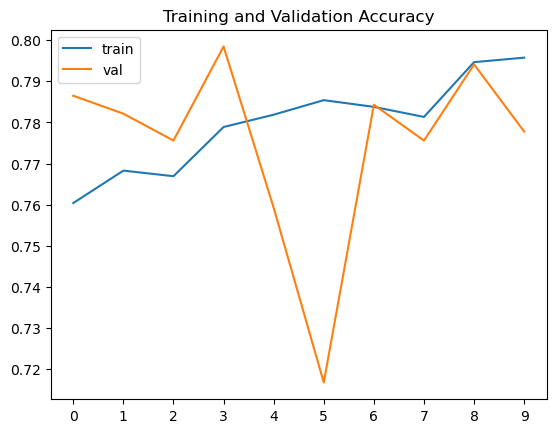

In [29]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.title('Training and Validation Accuracy')
plt.legend()

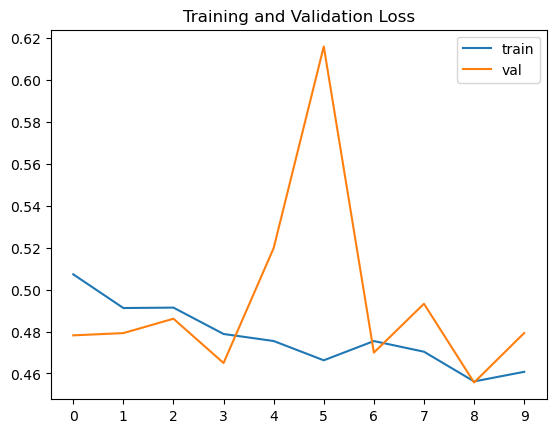

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(10))
plt.title('Training and Validation Loss')
plt.legend()

## Q5

In [30]:
np.mean(history.history['val_loss'])

0.49422143399715424

Answer: mean loss = `0.48`

## Q6

In [31]:
np.mean(history.history['val_accuracy'][5:])

0.7697167754173279

Answer: average of test accuracy for the last 5 epochs = `0.78`